# SARIMA Model Creation


In [5]:
# Libraries
#

import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.stattools import adfuller, pacf, pacf_ols
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
plt.style.use('ggplot') 
from pandas.plotting import lag_plot

In [6]:
# Function for  Residuals Analysis
#

def model_residuals_analysis(model):

    print(f'Residuals Analysis for Model:')
    print(model.summary())

    model.plot_diagnostics(figsize=(12,6))
    plt.show()

    #residuals = model.resid()
    # Durbin Watson Statistic
    #dw_stat = durbin_watson(residuals)
    #print(f'Durbin-Watson statistic of residuals, ideally close to 2: {dw_stat}')

    '''
    # Residuals Plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(residuals)
    ax1.set_title('Residuals for the (S)ARIMA(X) Model', fontsize=14)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Residuals', fontsize=12)
    plt.show()
    
    # ACF Plot
    lag_value = 30
    fig, ax1 = plt.subplots(figsize=(12, 6))
    plot_acf(residuals, lags=lag_value, ax=ax1)
    ax1.set_title('Autocorrelation Function (ACF) of Residuals', fontsize=14)
    ax1.set_xlabel('Lag', fontsize=12)
    ax1.set_ylabel('ACF', fontsize=12)
    plt.show()

    # PACF Plot
    lag_value = 30
    fig, ax1 = plt.subplots(figsize=(12, 6))
    plot_pacf(residuals, lags=lag_value, ax=ax1)
    ax1.set_title('PACF of Residuals', fontsize=14)
    ax1.set_xlabel('Lags', fontsize=12)
    ax1.set_ylabel('PACF', fontsize=12)
    plt.show()

    # Q-Q Plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    sm.qqplot(residuals, line='45', ax=ax1)
    ax1.set_title('Q-Q Plot of Residuals', fontsize=14)
    ax1.set_xlabel('Theoretical Quantile', fontsize=12)
    ax1.set_ylabel('Sample Quantiles', fontsize=12)
    plt.show()
    '''


In [7]:
# Function for model evaluation
#

def model_evaluation(model, testing_data):

    print(f'Model Evaluation on Testing Data')

    # Create predictions for the same length of time as the testing data
    forecast = model.get_prediction(start=testing_data.index[0], end=testing_data.index[-1])
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Plot the actuals, forecast and confidence intervals
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.set_title(f'Testing Data Comparison', fontsize=14)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Value')
    # Three line plots
    ax1.plot(testing_data.index, testing_data, color='blue', linewidth=1, label='Actual')
    ax1.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
    ax1.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')
    # Legend
    ax1.legend(loc='upper left', facecolor='white')
    plt.show()

    # Calculate Errors
    rmse = np.sqrt((forecast_values - testing_data) ** 2).mean()
    print(f'RMSE is: {rmse:.2f}')
    mape = np.mean(np.abs((testing_data - forecast_values) / testing_data)) * 100
    print(f'MAPE is: {mape:.2f}')

    #rmse = np.sqrt(mean_squared_error(testing_data, forecast_values))
    #mae = mean_absolute_error(testing_data, forecast_values)
    #print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    #print(f"Mean Absolute Error (MAE): {mae:.2f}")
    

In [22]:
# Function for manual SARIMA creation and evaluation
#

def create_model_SARIMA_manual(order, seasonal_order,
                               model_training_data, model_testing_data):

    # Check valid tuples
    if not isinstance(order, tuple) or not isinstance(seasonal_order, tuple):
        raise TypeError('Both orders must be tuples')
    if len(order) !=3 or len(seasonal_order) != 4:
        raise ValueError('Orders need 3 and 4 elements')
    
    print(f'SARIMA Model Manual Creation using order: {order} and seasonal order: {seasonal_order}')

    # Create the SARIMA model & fit it
    model_sarima_initial = SARIMAX(model_training_data, 
                                  order=order, seasonal_order=seasonal_order)
    model_sarima_fitted = model_sarima_initial.fit()

    # Show the summary of results & Residuals
    model_residuals_analysis(model_sarima_fitted)

    # Evaluate the model on the testing data
    model_evaluation(model_sarima_fitted, model_testing_data)

    return model_sarima_fitted



SARIMA Model Manual Creation using order: (4, 1, 2) and seasonal order: (1, 1, 2, 7)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.03105D+00    |proj g|=  3.18759D-01

At iterate    5    f=  3.91558D+00    |proj g|=  2.75819D-02

At iterate   10    f=  3.85716D+00    |proj g|=  8.66397D-02

At iterate   15    f=  3.84864D+00    |proj g|=  1.49384D-03

At iterate   20    f=  3.84831D+00    |proj g|=  1.25557D-03

At iterate   25    f=  3.84801D+00    |proj g|=  8.50538D-03

At iterate   30    f=  3.84767D+00    |proj g|=  1.84933D-03

At iterate   35    f=  3.84759D+00    |proj g|=  2.58246D-03

At iterate   40    f=  3.84749D+00    |proj g|=  3.01463D-03

At iterate   45    f=  3.84706D+00    |proj g|=  2.46234D-02


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.84349D+00    |proj g|=  1.32273D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   1.323D-02   3.843D+00
  F =   3.8434904043823033     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Residuals Analysis for Model:
                                     SARIMAX Results                                     
Dep. Variable:                      Standard_OCC   No. Observations:                 1096
Model:             SARIMAX(4, 1, 2)x(1, 1, 2, 7)   Log Likelihood               -4212.465
Date:                           Wed, 08 Jan 2025   AIC       

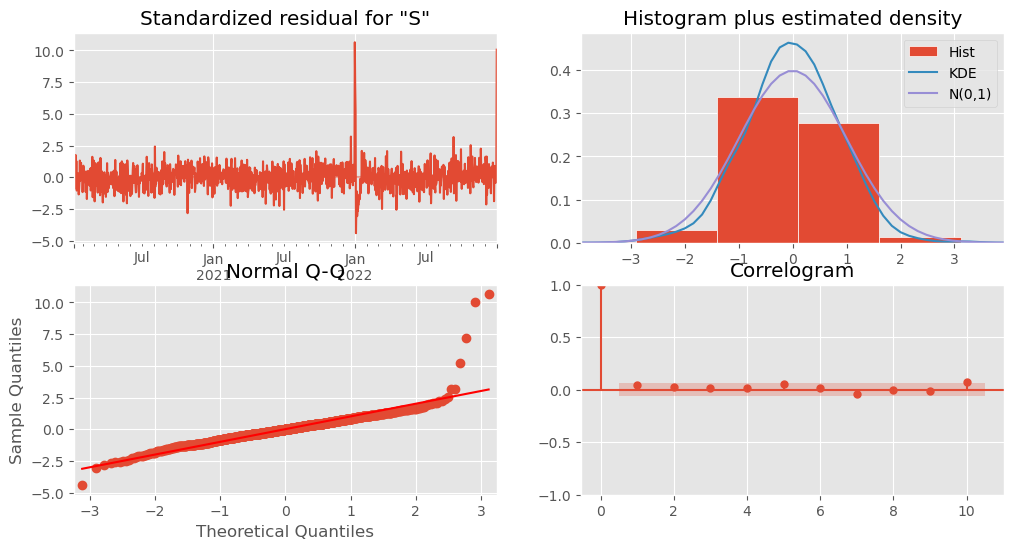

Model Evaluation on Testing Data


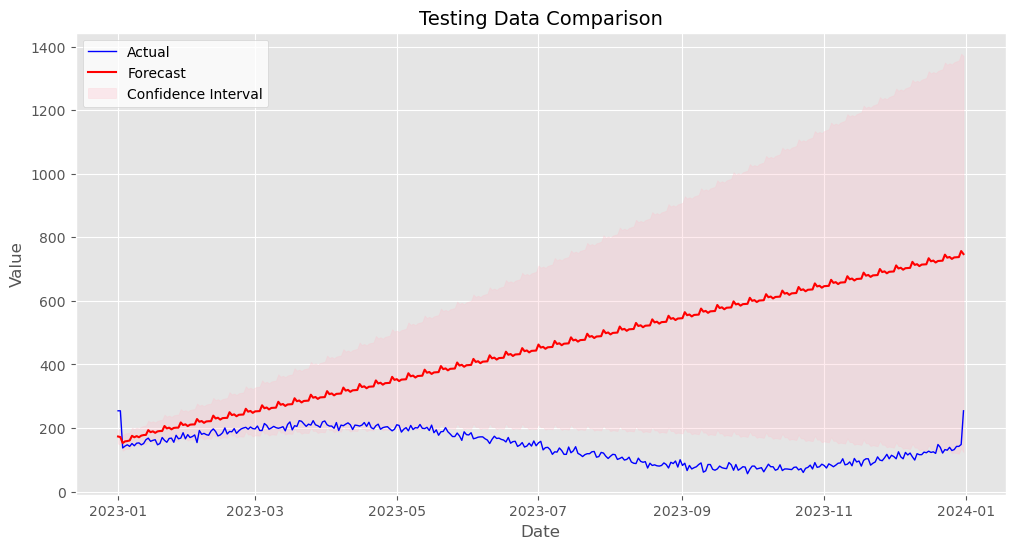

RMSE is: 311.34
MAPE is: 307.80
                                     SARIMAX Results                                     
Dep. Variable:                      Standard_OCC   No. Observations:                 1096
Model:             SARIMAX(4, 1, 2)x(1, 1, 2, 7)   Log Likelihood               -4212.465
Date:                           Wed, 08 Jan 2025   AIC                           8444.931
Time:                                   17:22:29   BIC                           8494.852
Sample:                               01-01-2020   HQIC                          8463.827
                                    - 12-31-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1291      0.039     28.783      0.000       1.052       1.206
ar.L2      

In [23]:
# Testing Block
# %store -r training_data
%store -r testing_data
%store -r model_sarima_initial
#model_residuals_analysis(model_sarima_manual)

order = model_sarima_initial.order
seasonal_order = model_sarima_initial.seasonal_order
new_model = create_model_SARIMA_manual(order, seasonal_order,
                                        training_data, testing_data)




## SARIMA Model Create & Evaluate - Manual

- Create the fitted model and save in model_sarima_manual

SARIMA Model Manual Creation using order: (3, 1, 1) and seasonal order: (1, 1, 1, 7)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.09053D+00    |proj g|=  3.35018D-01


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.94459D+00    |proj g|=  1.01366D-01

At iterate   10    f=  3.88055D+00    |proj g|=  8.90536D-02

At iterate   15    f=  3.85460D+00    |proj g|=  5.44761D-02

At iterate   20    f=  3.85114D+00    |proj g|=  5.44608D-04

At iterate   25    f=  3.85024D+00    |proj g|=  2.92939D-02

At iterate   30    f=  3.84914D+00    |proj g|=  1.15114D-03

At iterate   35    f=  3.84913D+00    |proj g|=  1.15783D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     45      1     0     0   1.335D-06   3.849D+00
  F =   3.8491339434652918     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

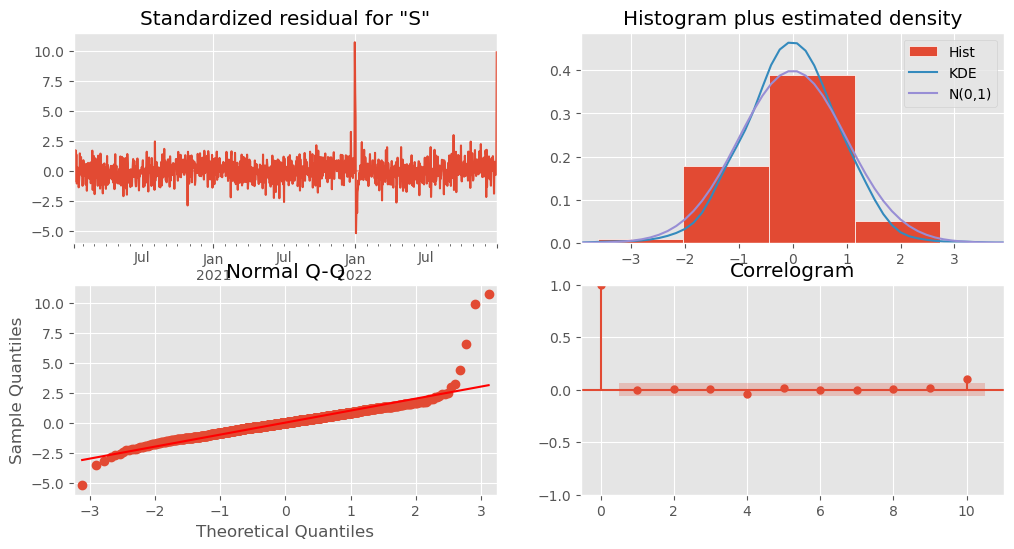

Model Evaluation on Testing Data


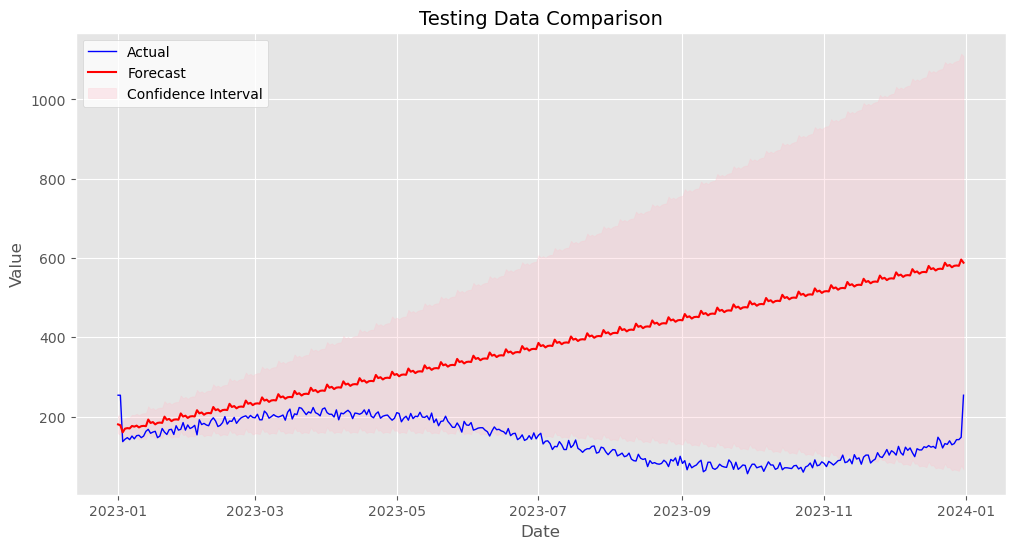

RMSE is: 235.92
MAPE is: 235.38
Stored 'model_sarima_manual' (SARIMAXResultsWrapper)


In [29]:
# Create the SARIMA Model - Manually
#

# Get the separately created training & testing datasets for SARIMA model creation
%store -r training_data
%store -r testing_data

# Define the order and seasonal order + seasonality
# order(p, d, q)
p = 3
d = 1
q = 1
# seasonal order (P, D, Q) + m
P = 1
D = 1
Q = 1
m = 7

# Create and evaluate the model
model_sarima_manual = create_model_SARIMA_manual((p,d,q), (P,D,Q,m),
                                         training_data, testing_data)

# Store the model
%store model_sarima_manual

## SARIMA Model Create & Evaluate - Auto ARIMA - First

- Save in model_sarima_auto

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[7]             : AIC=inf, Time=2.74 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=9473.205, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=8920.643, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.47 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=9250.699, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=8802.692, Time=0.51 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.85 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=9022.330, Time=0.16 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=8765.968, Time=0.52 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=8880.910, Time=0.26 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=1.71 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=1.44 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=8730.320, Time=0.59 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=8844.538, Time=0.42 s

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.91558D+00    |proj g|=  2.75819D-02

At iterate   10    f=  3.85716D+00    |proj g|=  8.66397D-02

At iterate   15    f=  3.84864D+00    |proj g|=  1.49384D-03

At iterate   20    f=  3.84831D+00    |proj g|=  1.25557D-03

At iterate   25    f=  3.84801D+00    |proj g|=  8.50538D-03

At iterate   30    f=  3.84767D+00    |proj g|=  1.84933D-03

At iterate   35    f=  3.84759D+00    |proj g|=  2.58246D-03

At iterate   40    f=  3.84749D+00    |proj g|=  3.01463D-03

At iterate   45    f=  3.84706D+00    |proj g|=  2.46234D-02


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.84349D+00    |proj g|=  1.32273D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   1.323D-02   3.843D+00
  F =   3.8434904043823033     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Residuals Analysis for Model:
                                     SARIMAX Results                                     
Dep. Variable:                      Standard_OCC   No. Observations:                 1096
Model:             SARIMAX(4, 1, 2)x(1, 1, 2, 7)   Log Likelihood               -4212.465
Date:                           Wed, 08 Jan 2025   AIC       

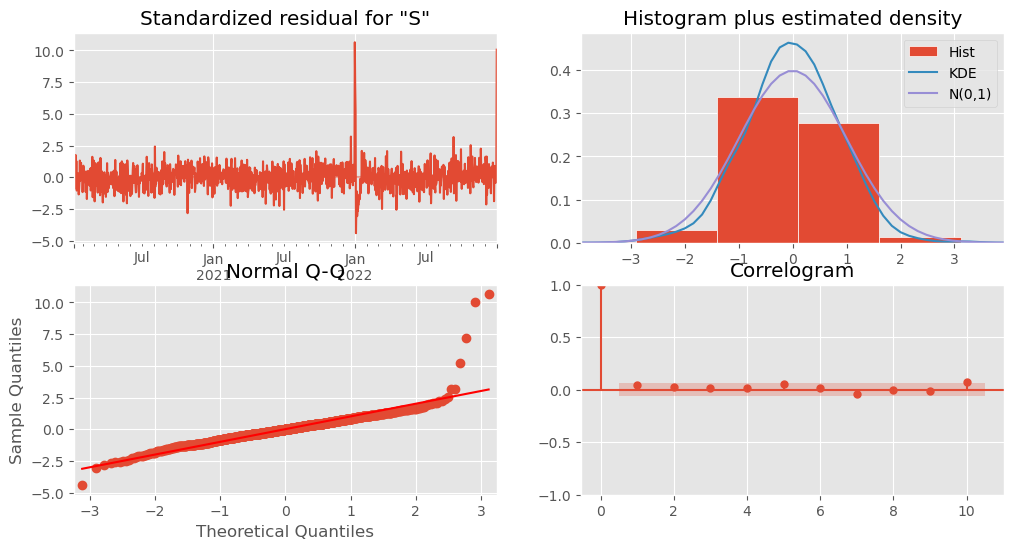

Model Evaluation on Testing Data


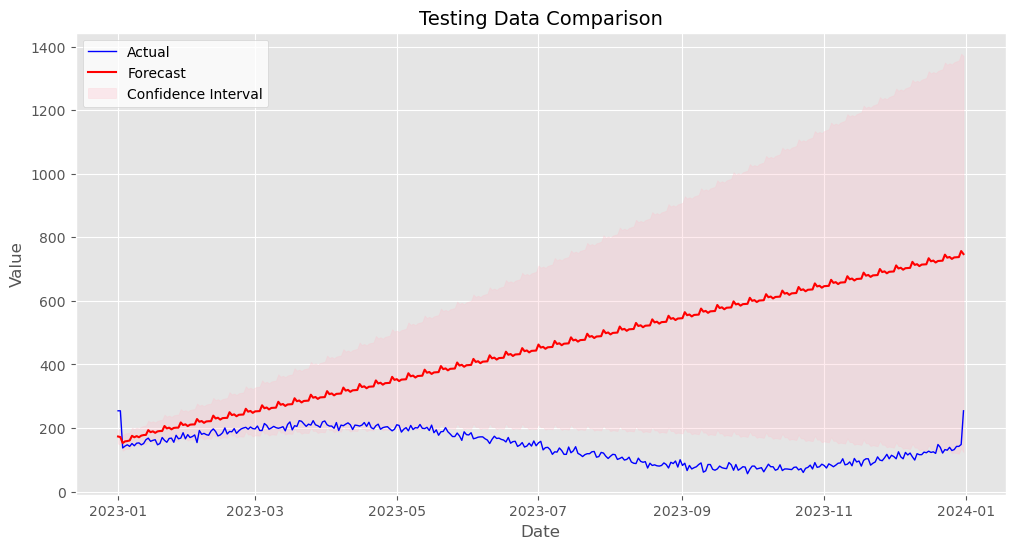

RMSE is: 311.34
MAPE is: 307.80
Stored 'model_sarima_auto' (SARIMAXResultsWrapper)


'\n# Convert the pmdarima model to a statsmodels SARIMAX model for residual analysis\nmodel_sarima_auto = model_sarima_initial.fit(training_data)\n\n# Show the summary of results & Residuals\nmodel_residuals_analysis(model_sarima_auto)\n\n# Evaluate the model on the testing data\nmodel_evaluation(model_sarima_auto, testing_data)\n\n# Store the model\n%store model_sarima_auto\n'

In [ ]:
# Create the SARIMA Model - Using Auto Arima - First
#

# Get the separately created training & testing datasets for SARIMA model creation
%store -r training_data
%store -r testing_data

model_sarima_initial = pm.auto_arima(
    training_data,
    d=1, D=1,
    m=7,
    seasonal=True, sp=7     # Seasonal and daily seasonal cycle
    trace=True
)

# Store the auto arima model
#print(model_sarima_initial.summary())
#%store model_sarima_auto_arima

# Get the preferred order parameters, manually create a SARIMAX model
# Just so that the residuals analysis etc can be done in the same way as pure manual
order = model_sarima_initial.order
seasonal_order = model_sarima_initial.seasonal_order
model_sarima_auto = create_model_SARIMA_manual(order, seasonal_order,
                                               training_data, testing_data)

# Store the model
%store model_sarima_auto

'''
# Convert the pmdarima model to a statsmodels SARIMAX model for residual analysis
model_sarima_auto = model_sarima_initial.fit(training_data)

# Show the summary of results & Residuals
model_residuals_analysis(model_sarima_auto)

# Evaluate the model on the testing data
model_evaluation(model_sarima_auto, testing_data)

# Store the model
%store model_sarima_auto
'''

## SARIMA Model Create & Evaluate - Auto ARIMA - Second

- Save in model_sarima_auto_second

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=9473.205, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=8920.643, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.48 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=9250.699, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=8802.692, Time=0.32 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=8723.919, Time=0.53 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=inf, Time=2.71 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=2.17 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=8941.142, Time=0.53 sec
 ARIMA(2,1,0)(3,1,0)[7]             : AIC=8694.720, Time=0.74 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=8765.968, Time=0.42 sec
 ARIMA(2,1,0)(3,1,1)[7]             : AIC=inf, Time=4.20 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=1.94 sec
 ARIMA(3,1,0)(3,1,0)[7]             : AIC=8654.898, Time=1.04 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=8730.320, Time=0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.96176D+00    |proj g|=  5.15657D-02

At iterate   10    f=  3.89847D+00    |proj g|=  2.28767D-02

At iterate   15    f=  3.87075D+00    |proj g|=  2.68053D-02

At iterate   20    f=  3.84927D+00    |proj g|=  3.93821D-03

At iterate   25    f=  3.84921D+00    |proj g|=  2.54060D-03

At iterate   30    f=  3.84892D+00    |proj g|=  1.21032D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     38      1     0     0   1.154D-05   3.849D+00
  F =   3.8489137053819098     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Residuals Analysis for Model:
                     

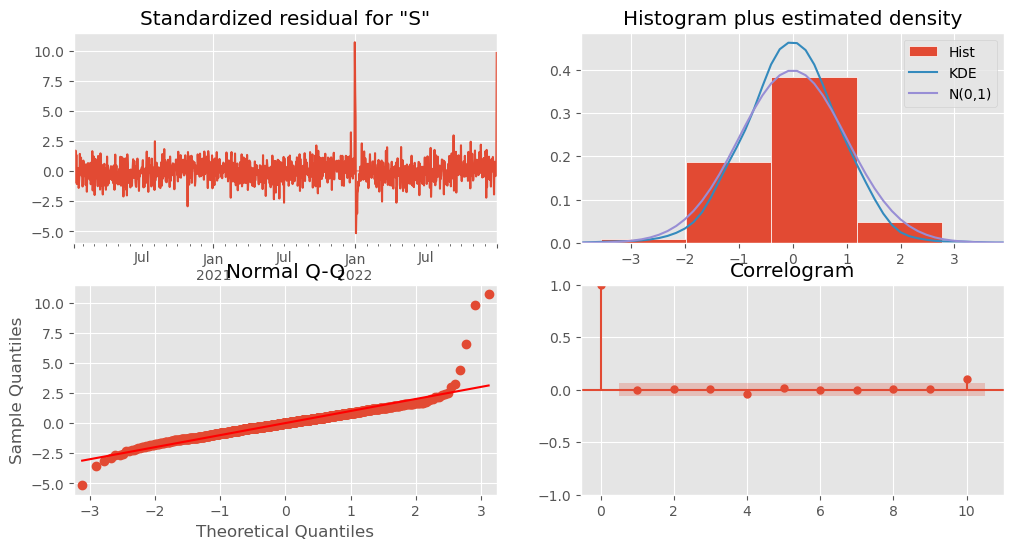

Model Evaluation on Testing Data


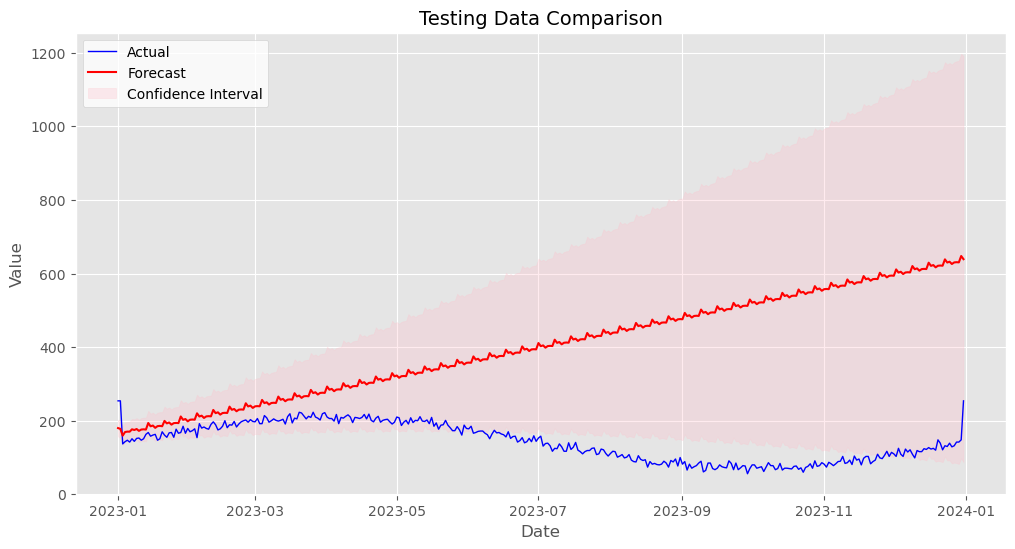

RMSE is: 260.18
MAPE is: 258.63
Stored 'model_sarima_auto_second' (SARIMAXResultsWrapper)


In [32]:
# Determine the SARIMA Model - Using Auto Arima

# Get the separately created training & testing datasets for SARIMA model creation
%store -r training_data
%store -r testing_data

auto_model = pm.auto_arima(
    training_data,           
    start_p=0, max_p=3,         # Range for AR order
    d=1,                        # Differencing order (can be set to None to auto-detect)
    start_q=0, max_q=60,        # Range for MA order
    start_P=0, max_P=3,         # Range for seasonal AR order
    D=1,                        # Seasonal differencing order (can be set to None to auto-detect)
    start_Q=0, max_Q=60,        # Range for seasonal MA order
    m=7,                        # Seasonal cycle length 365 for annual, with daily steps
    seasonal=True,              # Enable seasonality
    stepwise=True,              # Enable stepwise search to reduce computation
    trace=True,                 # Print model details during the search
    information_criterion='aic' # Criterion for model selection
)

print(auto_model.summary())

# Get the preferred order parameters, manually create a SARIMAX model
# Just so that the residuals analysis etc can be done in the same way as pure manual
order = auto_model.order
seasonal_order = auto_model.seasonal_order
model_sarima_auto_second = create_model_SARIMA_manual(order, seasonal_order,
                                               training_data, testing_data)

# Store the model
%store model_sarima_auto_second

- Suggests ARIMA(3,1,1)(2,1,0),7 with AIC of 11587.134
- ?? earlier indicated q=60
- ?? m needs to be 365 but this fails as too long
- tried different differencing but comes back to 1